In [202]:
import ecg_plot
import matplotlib.pyplot as plt
from scipy.io import loadmat
#import physionet_challenge_utility_script as pc
import ecg_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
import wfdb


#import tensorflow_addons as tfa
#from keras.preprocessing.sequence import pad_sequences

In [266]:
def plot_ecg(path):
    ecg_datas = loadmat(path)
    ecg_plot.plot(ecg_datas["ecg_data"], sample_rate=500, title='test',columns= 2, row_height = 6, style="bw",
    show_grid = False)
    ecg_plot.show()
    
#plot_ecg("output.mat")
#plot_ecg("raw_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/00000/00001_hr.mat")

In [ ]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord("raw_data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records500/00000/00001_hr") 
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

# Save data to .mat file
sio.savemat('output.mat', {'ecg_data': record.p_signal})

In [265]:
#plot_ecg("output.mat")

(5000, 12)

(12, 5000)

In [250]:
ecg_data = loadmat("raw_data/WFDB/HR00001.mat")
ecg_data["val"]

array([[-115, -115, -115, ...,  210,  210,  210],
       [ -50,  -50,  -50, ...,  205,  205,  205],
       [  65,   65,   65, ...,   -5,   -5,   -5],
       ...,
       [ -35,  -35,  -35, ...,  185,  185,  185],
       [ -35,  -35,  -35, ...,  170,  170,  170],
       [ -75,  -75,  -75, ...,  180,  180,  180]], dtype=int16)

In [193]:
data

<module 'data' (<_frozen_importlib_external._NamespaceLoader object at 0x103f9ee00>)>

 ### Binarised ecg

In [116]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt

In [123]:
from PIL import Image
img = Image.open('raw_data/pic/ecg_2.png')

In [115]:
img.show()

In [144]:
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [145]:
read_this('raw_data/pic/ecg_2.png', gray_scale=True)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

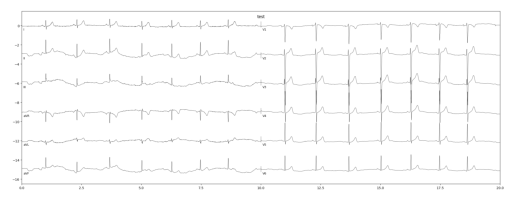

In [148]:
# Reading an image
image = read_this('raw_data/pic/ecg_2.png', gray_scale=True)

# Displaying the image
plt.imshow(image, cmap='gray')
plt.axis('off') # to hide the x and y values
plt.show()

In [153]:

def binarize_lib(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    th, image_b = cv2.threshold(src=image_src, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        
    return image_b

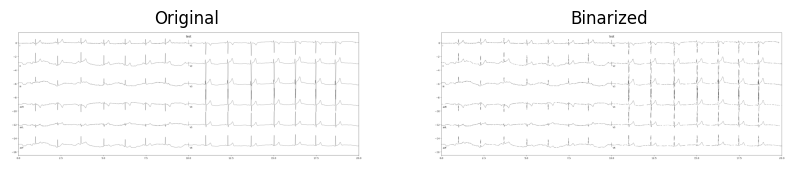

In [157]:
image_bin = binarize_lib(image_file='raw_data/pic/ecg_2.png', with_plot=True, gray_scale=True)
plt.imshow(image_bin, cmap='gray')
plt.axis('off')
plt.show()

In [159]:
cv2.imwrite('binarized_image.jpeg', image_bin)

True

## OTSU

In [162]:
def binarize_lib_otsu(image_file, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    _, image_b = cv2.threshold(src=image_src, thresh=0, maxval=255, type=cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 40))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Otsu Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        plt.savefig('original_and_otsu_binarized.png')  # This saves the figure
    return image_b


In [163]:
image_bin_otsu = binarize_lib_otsu(image_file='raw_data/pic/ecg_2.png', with_plot=True, gray_scale=True)
cv2.imwrite('otsu_binarized_image.png', image_bin_otsu)  # This saves the binarized image

True

## Rotation

In [170]:
import cv2
import numpy as np

def rotate_image(image, angle):
    # Grab the dimensions of the image
    height, width = image.shape[:2]

    # Get the center of the image
    image_center = (width / 2, height / 2)

    # Perform the rotation
    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)
    radians = np.deg2rad(angle)
    sin = np.sin(radians)
    cos = np.cos(radians)
    bound_w = int((height * abs(sin)) + (width * abs(cos)))
    bound_h = int((height * abs(cos)) + (width * abs(sin)))

    rotation_mat[0, 2] += ((bound_w / 2) - image_center[0])
    rotation_mat[1, 2] += ((bound_h / 2) - image_center[1])

    rotated_image = cv2.warpAffine(image, rotation_mat, (bound_w, bound_h),borderValue=(255, 255, 255))
    return rotated_image


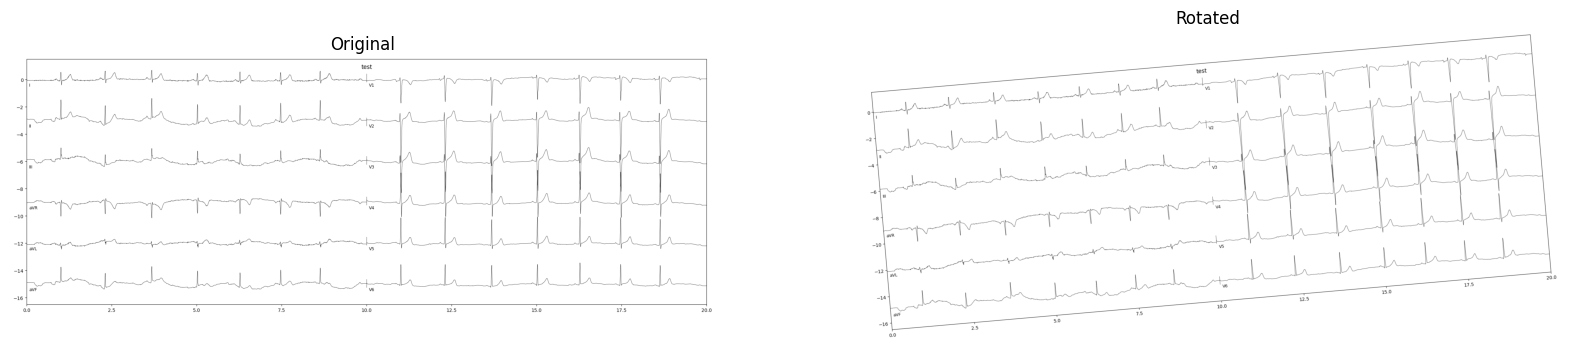

In [177]:
# Read the image
image = cv2.imread('raw_data/pic/ecg_2.png', cv2.IMREAD_GRAYSCALE)

# Rotate the image
rotated_image = rotate_image(image, 5)  # Rotate by 10 degrees

# Display the original and rotated image
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original'),plt.axis('off')
plt.subplot(122), plt.imshow(rotated_image, cmap='gray'), plt.title('Rotated'), plt.axis('off')
plt.show()

## Noise Injection

In [178]:
import numpy as np

def add_noise(image, mean=0, std=1):
    gauss = np.random.normal(mean, std, (image.shape[0], image.shape[1]))
    gauss = gauss.reshape(image.shape[0], image.shape[1])
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Ensure the values are within 0-255
    return noisy_image.astype('uint8')  # Convert back to 8-bit pixels


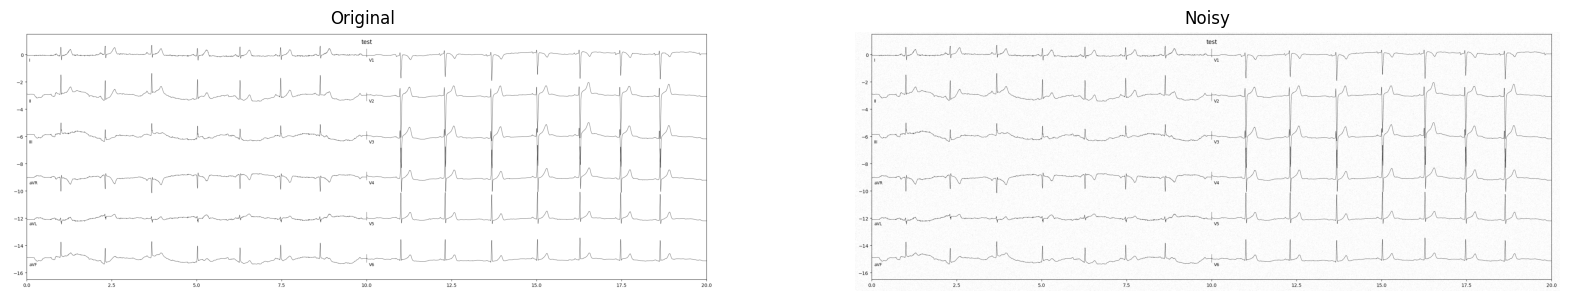

In [179]:
# Read the image
image = cv2.imread('raw_data/pic/ecg_2.png', cv2.IMREAD_GRAYSCALE)

# Add noise to the image
noisy_image = add_noise(image, mean=0, std=10)

# Display the original and noisy image
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy'), plt.axis('off')
plt.show()


In [180]:
# Save the noisy image
cv2.imwrite('raw_data/pic/ecg_2_noisy.png', noisy_image)


True

## Blur

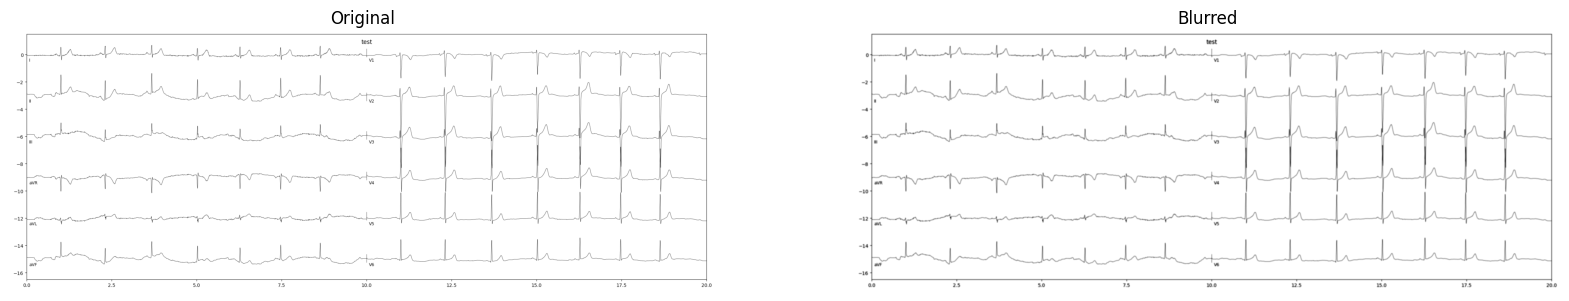

In [181]:
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0) # you can change the kernel size (5, 5) as needed

# Display the original and blurred image
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(blurred_image, cmap='gray'), plt.title('Blurred'), plt.axis('off')
plt.show()


In [183]:
# Save the blurred image
cv2.imwrite('raw_data/pic/ecg_2_blurred.png', blurred_image)

True

## Pytorch

In [282]:
import torch
import torchvision.transforms as T
from PIL import Image
import numpy as np


class GaussianNoise:
    def __init__(self, mean=0., std=0.1):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        return torch.clamp(noisy_tensor, 0, 1)


class GaussianBlur:
    def __init__(self, kernel_size=1, std=1):
        self.kernel_size = kernel_size
        self.std = std

    def __call__(self, tensor):
        # Ensure tensor has 4 dimensions (batch_size, channels, height, width)
        while tensor.dim() < 4:
            tensor = tensor.unsqueeze(0)
        
        # Generate a Gaussian kernel
        kernel = torch.exp(torch.linspace(-(self.kernel_size // 2), self.kernel_size // 2, self.kernel_size) ** 2 / (-2 * self.std ** 2)) 
        kernel /= kernel.sum()
        kernel = kernel.repeat(tensor.size(1), 1, self.kernel_size, self.kernel_size)
        
        # Apply the kernel to the input
        return torch.nn.functional.conv2d(tensor, kernel, padding=self.kernel_size//2).squeeze(0)

# Open the image file
image = Image.open('raw_data/pic/00002_hr.jpg')

# Transformation to tensor
to_tensor = T.ToTensor()
tensor_image = to_tensor(image)

# Apply noise transformation and save the image
noise_transform = T.Compose([
    GaussianNoise(),
    T.ToPILImage()
])
noise_image = noise_transform(tensor_image)
noise_image.save('noise_image.jpg')

# Apply positive rotation transformation and save the image
rotate_right_transform = T.Compose([
    T.RandomAffine(degrees=(0, 45)),  # Rotate right
    T.ToPILImage()
])
rotated_right_image = rotate_right_transform(tensor_image)
rotated_right_image.save('rotated_right_image.jpg')

# Apply negative rotation transformation and save the image
rotate_left_transform = T.Compose([
    T.RandomAffine(degrees=(-45, 0)),  # Rotate left
    T.ToPILImage()
])
rotated_left_image = rotate_left_transform(tensor_image)
rotated_left_image.save('rotated_left_image.jpg')

# Apply blur transformation and save the image
blur_transform = T.Compose([
    GaussianBlur(),
    T.ToPILImage()
])
blurred_image = blur_transform(tensor_image)
blurred_image.save('blurred_image.jpg')
